# Inferential Statistics Ib - Frequentism

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t
from scipy.stats import norm
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ sample mean is 13270.42 and sample standard deviation is 12105.48 

These statistics are not very appropriate for the data because the data is heavily skewed and does not seem like a normal distribution. 

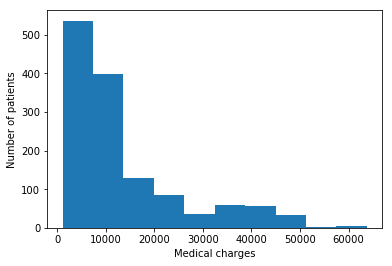

In [5]:
_ = plt.hist(medical['charges'])
_ = plt.xlabel('Medical charges')
_ = plt.ylabel('Number of patients')
plt.show()

In [150]:
mean = np.mean(medical['charges'])
std = np.std(medical['charges']) # Without correction of ddof=1
pop_std = np.std(medical['charges'],ddof=1)
print(mean,std,pop_std)


13270.422265141257 12105.484975561605 12110.011236693994


__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Based on the central limit theorem, if we resample the population with a large sample size n (n>30), the distribution of sample means will approximate a normal distribution. Using the sample data above we can estimate the population mean and population standard deviation, the latter can then be used to estimate the standard deviation of sampling ditribution of the mean via 
\begin{equation}
\sigma_{mean} = \frac{\sigma}{\sqrt n}
\end{equation}

Then we can calculate the 95% confidence interval for the mean and carry out a _t_-test to answer the question of whether the average charge is below 12000. Since the sample size is large (1338), a _z_-test is appropriate as well.

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__ A 95% confidence interval (one sided, on the lower side) would be appropriate. 
Based on the lower 95% confidence interval of 12621.54, it is likely that the average charge has NOT fallen bellow 12000. 

In [107]:
# Calculate critival value and 95% confidence interval
alpha = 1 - 0.05/2
z = norm.ppf(alpha)
tvalue = t.ppf(alpha,1337)
print(z,tvalue) # z and t values are similar

1.959963984540054 1.961739888600845


In [152]:
# 95% Confidence interval 
CI_upper = mean + z*pop_std/np.sqrt(1338) # Optional 
CI_lower = mean - z*pop_std/np.sqrt(1338) 
print('CI_lower:', CI_lower,'CI_upper:',CI_upper)

CI_lower: 12621.54197822916 CI_upper: 13919.302552053354


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__ Null hypothesis (H0): people with insurance are charged the same as those without.
Alternative hypothesis (H1):people with insurance are charged a different amount to those without.

    We assume that the two groups have equal variances.

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ The results are the same from both approaches, based on codes below.

In [93]:
# Split dataset into insured and uninsured groups
insured = medical.loc[medical['insuranceclaim']==1,]
uninsured = medical.loc[medical['insuranceclaim']==0,]

In [94]:
print(insured.shape)
print(uninsured.shape)

(783, 8)
(555, 8)


In [153]:
# Calculate sample mean and sample standard deviation for both groups
# For insured group:
x1 = np.mean(insured['charges'])
x0 = np.mean(uninsured['charges'])
s1 = np.std(insured['charges'],ddof=1)
s0 = np.std(uninsured['charges'],ddof=1)
n1 = 783
n0 = 555
print('Insured:',x1,s1,'Uninsured:',x0,s0)

Insured: 16423.928276537663 14045.928418802127 Uninsured: 8821.421892306294 6446.510126811736


In [154]:
# Calculate pooled standard deviation and t statistic
sp = np.sqrt(((n0-1)*s0**2+(n1-1)*s1**2)/(n0+n1-2))
tp = (x1-x0)/(sp*np.sqrt(1/n0+1/n1))
print(sp,tp)

11520.034268775256 11.89329903087671


In [155]:
df=n0+n1-2
p= 1 - t.cdf(abs(tp),df) # p*2 if it is a 2 tailed test
print(p)

0.0


In [144]:
# Use scipy.stats function ttest_ind()
t2, p2=stats.ttest_ind(insured['charges'],uninsured['charges'])
print(t2,p2)

11.893299030876712 4.461230231620717e-31


In [146]:
round(tp,2)==round(t2,2) # Compare manually-calculated parameters with that from scipy.stats

True

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__ When equal variances are not assumed, we can perform Welch's t-test, by specify equal_var=False in the ttest_ind() function.

In [156]:
# Not assume equal variances and perform Welch's t-test
t3,p3 = stats.ttest_ind(insured['charges'],uninsured['charges'],equal_var=False)
print(t3,p3)

13.298031957975649 1.1105103216309125e-37


__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ I do not see a _z_-test for a sample in scipy.stats. _z_-test is appropriate when sample size is large (e.g., >30). For a large sample, the two test statistics are similar and  would yield similar results.

Useful link:
https://keydifferences.com/difference-between-t-test-and-z-test.html

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test